### Reading and Understanding the Data

In [1]:
# To supress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [2]:
# read the csv file
df= pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
#we can drop Id column as its just a serial number 
df.drop(['Id'], axis =1, inplace = True)
df.shape

(1460, 80)

In [8]:
# Check for percentage of null values in each column
null= round(100*(df.isnull().sum()/len(df.index)),2)
df_null=null.to_frame()
df_null = df_null.rename(columns= {0: 'null%'})
df_null[df_null['null%'] != 0]

,null%
LotFrontage,17.74
Alley,93.77
MasVnrType,0.55
MasVnrArea,0.55
BsmtQual,2.53
BsmtCond,2.53
BsmtExposure,2.60
BsmtFinType1,2.53
BsmtFinType2,2.60
Electrical,0.07


In [9]:
#'GarageType','GarageFinish','GarageQual','GarageCond' -'No Garage' is mentioned as 'NA'. So replace all 'NA' with 'No Garage'.
df['GarageType'].fillna('No Garage', inplace=True)
df['GarageFinish'].fillna('No Garage', inplace=True)
df['GarageQual'].fillna('No Garage', inplace=True)
df['GarageCond'].fillna('No Garage', inplace=True)

# Fill 'NA' in 'GarageYrBlt' column with 0
df['GarageYrBlt'].fillna(0, inplace=True)

In [10]:
# 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'-'No Basement' is mentioned as 'NA'.
# So replace all 'NA' with 'No Basement'.
df['BsmtQual'].fillna('No Basement', inplace=True)
df['BsmtCond'].fillna('No Basement', inplace=True)
df['BsmtExposure'].fillna('No Basement', inplace=True)
df['BsmtFinType1'].fillna('No Basement', inplace=True)
df['BsmtFinType2'].fillna('No Basement', inplace=True)

In [11]:
# 'FireplaceQu','PoolQC','Fence'- Replace 'NA' in these columns with the corresponding value.
df['FireplaceQu'].fillna('No Fireplace', inplace=True)
df['PoolQC'].fillna('No Pool', inplace=True)
df['Fence'].fillna('No Fence', inplace=True)

In [12]:
# Now, Check again for percentage of null values in each column
null= round(100*(df.isnull().sum()/len(df.index)),2)
df_null=null.to_frame()
df_null = df_null.rename(columns= {0: 'null%'})
df_null[df_null['null%'] != 0]

,null%
LotFrontage,17.74
Alley,93.77
MasVnrType,0.55
MasVnrArea,0.55
Electrical,0.07
MiscFeature,96.30


In [13]:
#'Alley', 'MiscFeature' columns have very high number of 'NA' values. Let's drop these two columns
df = df.drop(['Alley', 'MiscFeature'], axis = 1)
df.shape

(1460, 78)

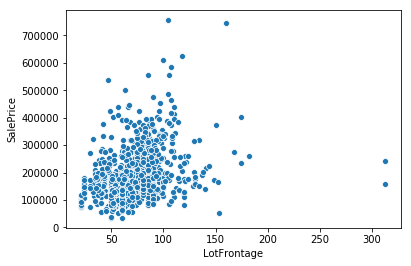

In [14]:
# LotFrontage has 17.74% missing values. Let us check how much is this variable related to 'SalePrice' by plotting a graph
sns.scatterplot(df['LotFrontage'],df['SalePrice'])

In [15]:
# Fill 'NA' values in 'LotFrontage' with median of 'LotFrontage'
df['LotFrontage'].fillna((df['LotFrontage'].median()), inplace = True)

In [16]:
# Since, the null% is relatively small in 'MasVnrType', 'MasVnrArea', 'Electrical', we can remove the rows where it is 'NA'.
df = df[pd.notnull(df['MasVnrType'])]
df = df[pd.notnull(df['MasVnrArea'])]
df = df[pd.notnull(df['Electrical'])]

In [17]:
# Check if any more null values are present
df.isnull().values.any()

False

#### There are no more null values in the dataset.

In [18]:
#Check the shape of df after data cleaning
df.shape

(1451, 78)

### Data Visualization

Text(0.5, 0, 'Sale price')

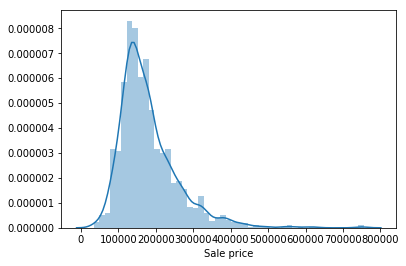

In [19]:
sns.distplot(df['SalePrice'])
plt.xlabel('Sale price')

#### We can see that the dependent variable is skewed but just because it is skewed doesn't mean we need log transformation. The Linear assumption of the regression is based on error terms i.e the error terms should be normally distributed , If the residual plot is deviating from linear assumptions then we should worry about skewness else no need to do any transformation. 
#### For this, I have plotted the residuals below in this file and found that the error terms are normally distributed. Hence, I am not doing any log transformation on the y variable.

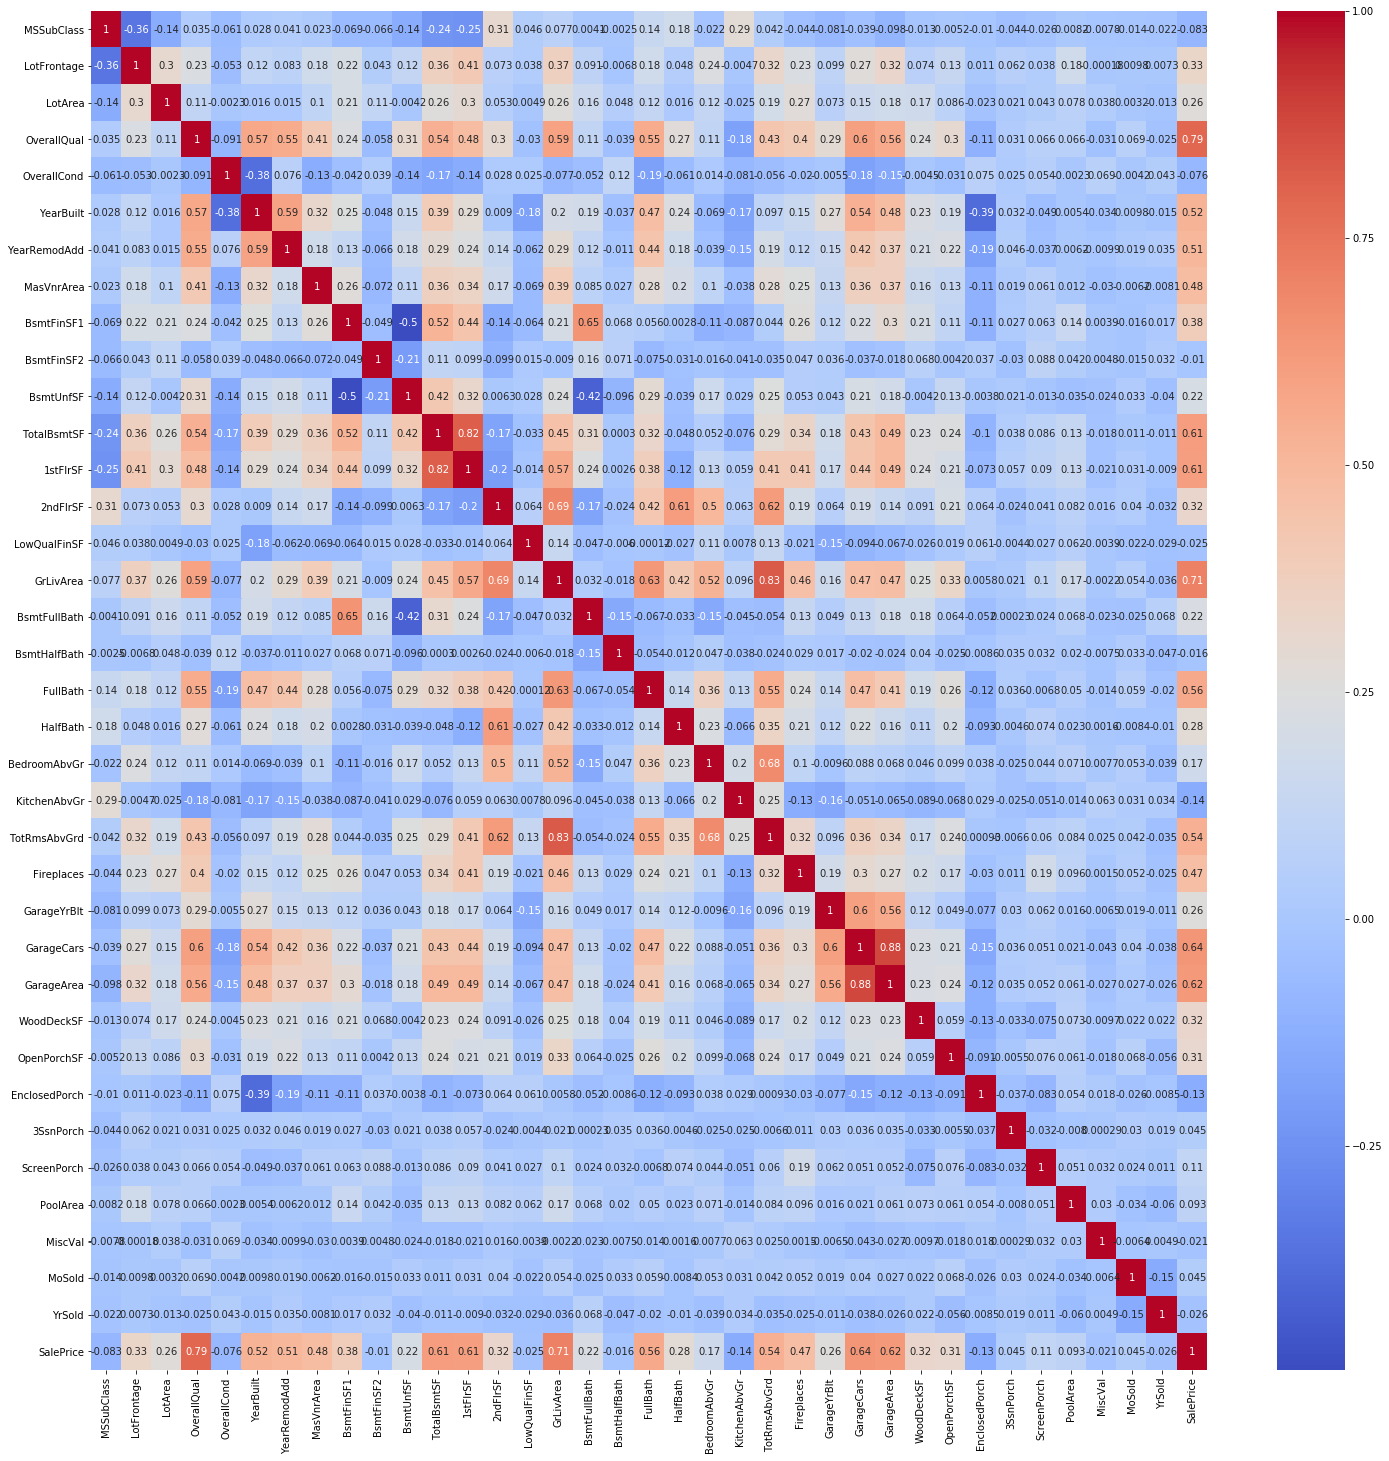

In [20]:
# Let us see the correlation plot among the numeric variables
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)
plt.show()

Correlations are difficult to view and interpret using heatmap. Let us use below method.

In [21]:
# Create correlation matrix
corr_matrix = df.corr().abs()
corr_matrix

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
upper

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
print(to_drop)

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']


In [22]:
# Drop the above Features from dataframe
df.drop(df[to_drop], axis=1, inplace = True)
df.shape

(1451, 75)

#### Let us visualize all the numeric variables present in dataset using pairplot.

In [23]:
# identify numerical and non-numerical columns 
NumCols = []
NonNumCols = []

for col in list(df):
    if df[col].dtypes != 'object':
        NumCols.append(col)  
    else:
        NonNumCols.append(col)
print('Numerical columns:',len(NumCols),'\n',NumCols)

Numerical columns: 34 
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


#### There are total of 34 numeric columns. Let us divide them into 2 sets for better visualization of plots

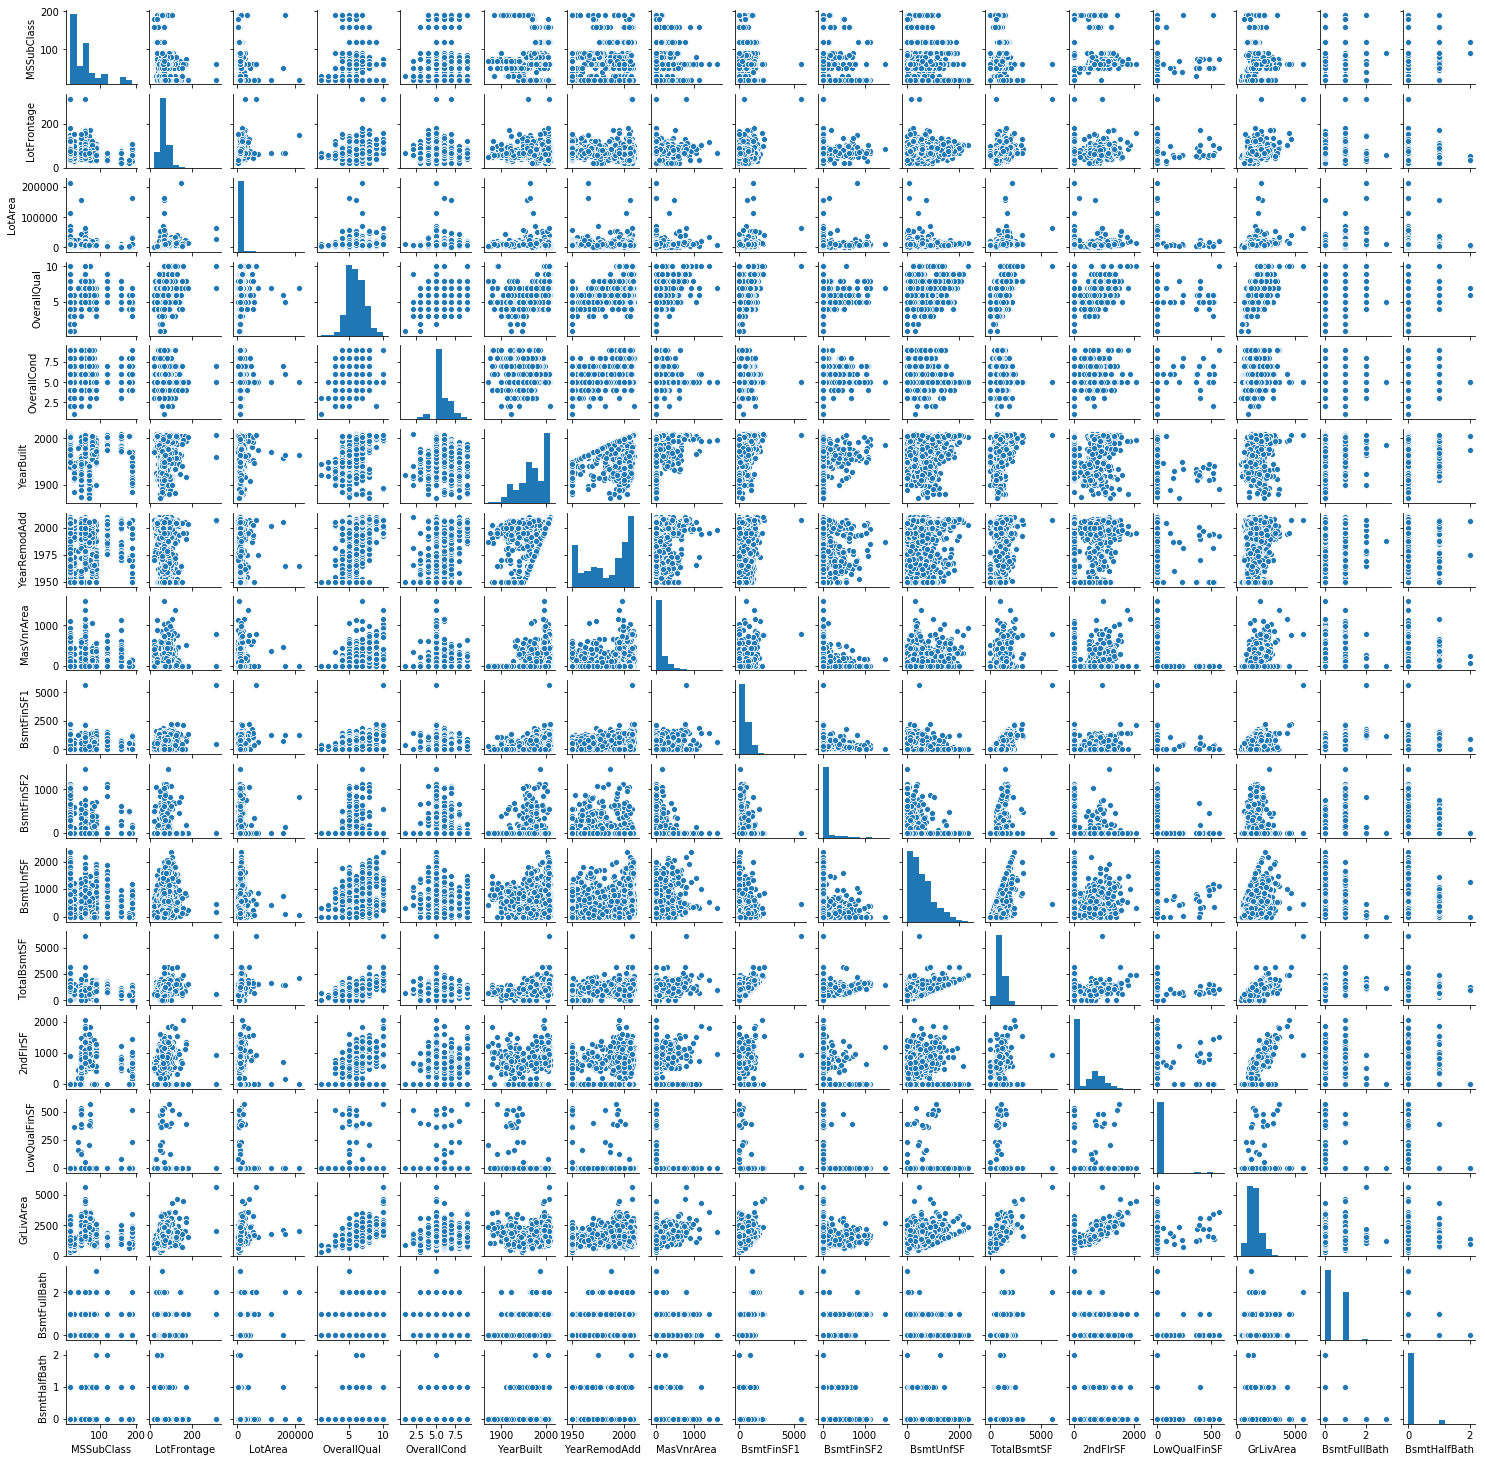

In [24]:
numvar1=NumCols[:17]
pairplot = sns.pairplot(df[numvar1])
pairplot.fig.set_size_inches(20,20)
plt.show()

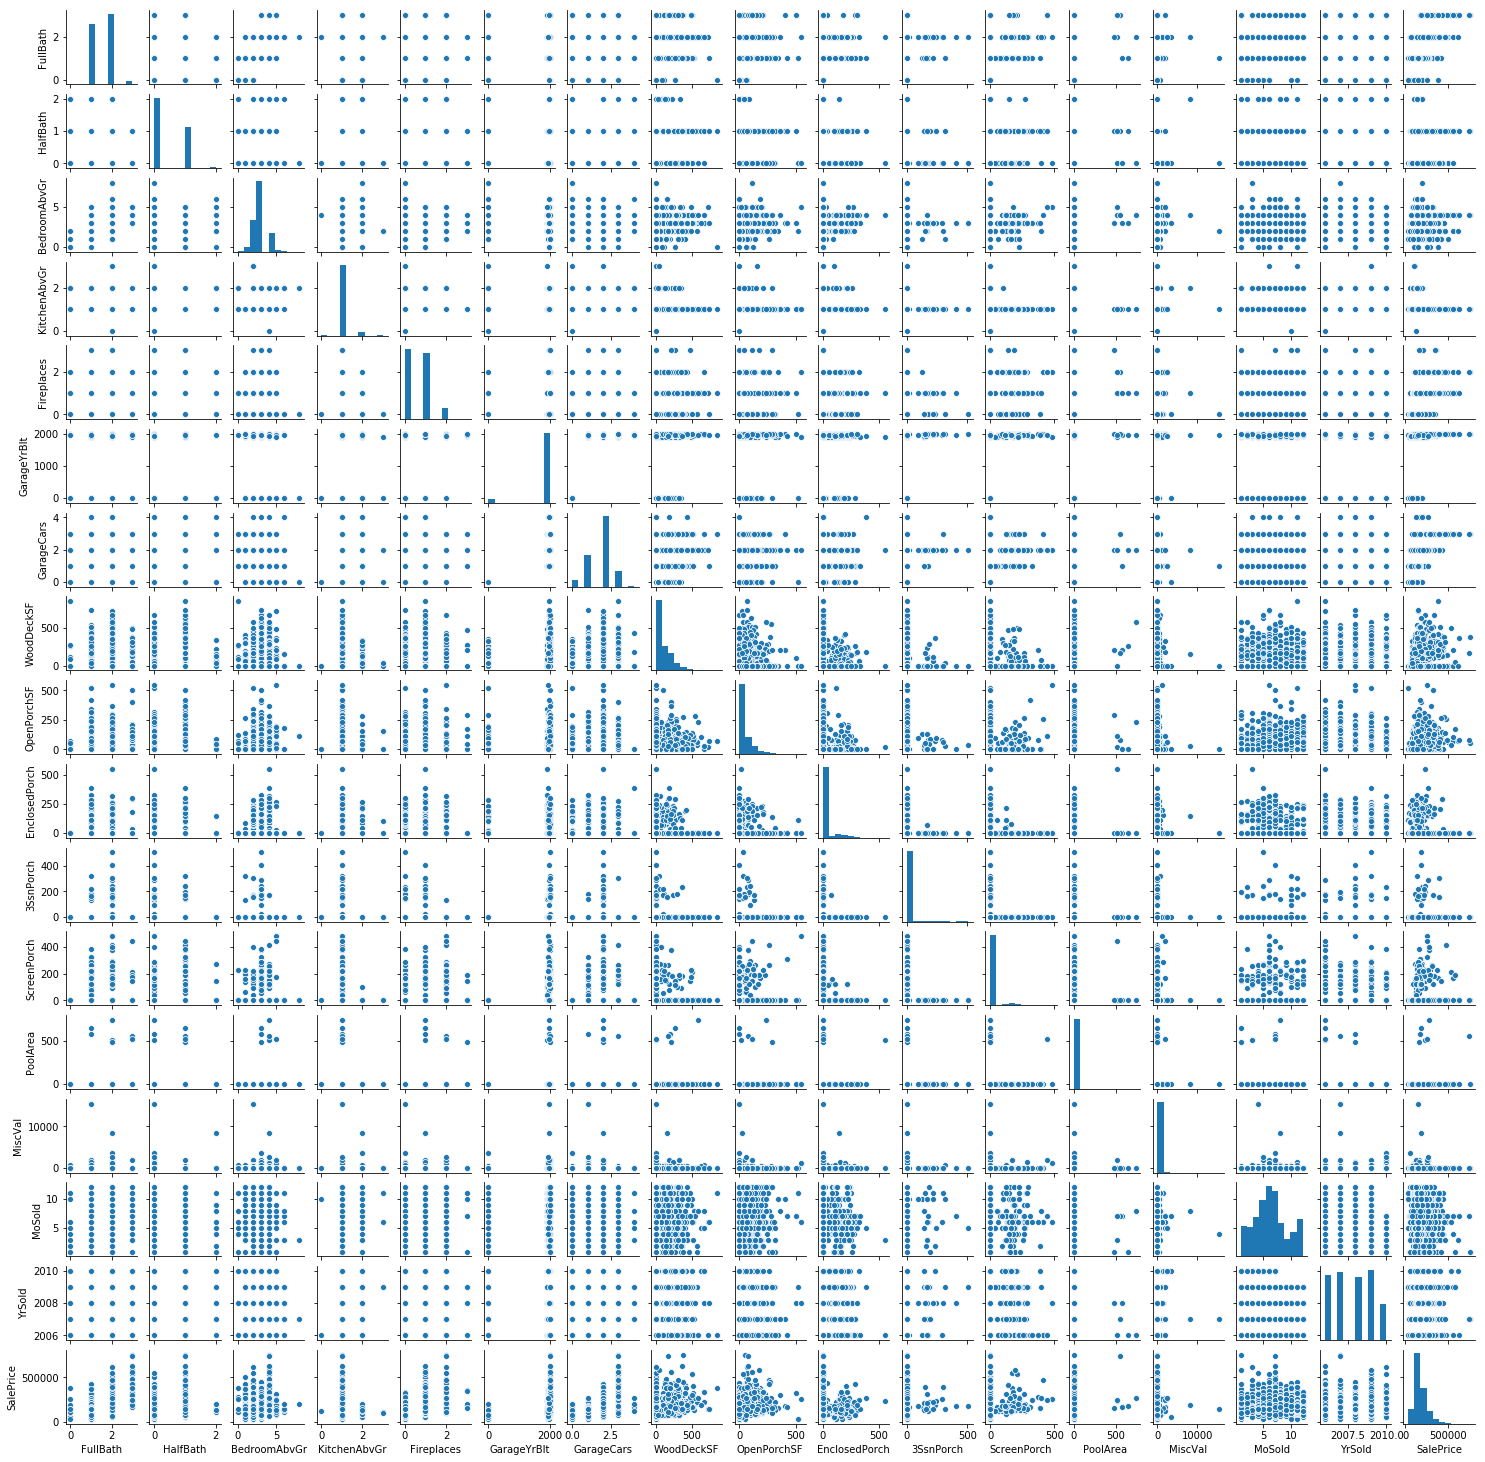

In [25]:
numvar2=NumCols[17:]
pairplot = sns.pairplot(df[numvar2])
pairplot.fig.set_size_inches(20,20)
plt.show()

### Deriving new features

In [26]:
# Changing all year columns to their age i.e.Present year - Year

df['PresentYear'] = datetime.datetime.now().year
df["AgeYearBuilt"] = df['PresentYear'] - df['YearBuilt']
df['AgeRemodAdd'] = df['PresentYear'] - df['YearRemodAdd']
df['AgeSold'] = df['PresentYear'] - df['YrSold']
df['AgeGarageYrBlt'] = df['PresentYear'] - df['GarageYrBlt']
df.drop(['PresentYear', 'YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis = 1, inplace = True)
print(df.shape)
df.columns

(1451, 75)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'F

### Dealing with categorical data - dummy variables

In [27]:
#check for non numerical and numerical columns again
NumCols = []
NonNumCols = []

for col in list(df):
    if df[col].dtypes != 'object':
        NumCols.append(col)  
    else:
        NonNumCols.append(col)
print('Non Numeric columns:',len(NonNumCols),'\n',NonNumCols)

Non Numeric columns: 41 
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition']


In [28]:
# Listing distinct variables for each Categorical column
for col in NonNumCols:
    print(col,' : ',df[col].unique(),' : ',df[col].nunique())

MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']  :  5
Street  :  ['Pave' 'Grvl']  :  2
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']  :  4
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']  :  4
Utilities  :  ['AllPub' 'NoSeWa']  :  2
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']  :  5
LandSlope  :  ['Gtl' 'Mod' 'Sev']  :  3
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']  :  25
Condition1  :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']  :  9
Condition2  :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']  :  8
BldgType  :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']  :  5
HouseStyle  :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']  :  8
RoofStyle  :  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']  :  6
RoofMatl  :  [

In [29]:
df['Street'] = df.Street.map({'Grvl':0,'Pave':1})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
df['Utilities'] = df.Utilities.map({'NoSeWa':0,'AllPub':1})
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'No Basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['FireplaceQu'] = df.FireplaceQu.map({"No Fireplace": 0,"Po": 1, "Fa": 2, "TA": 3,"Gd": 4,'Ex': 5})
df['GarageFinish'] = df.GarageFinish.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['PoolQC'] = df.PoolQC.map({"No Pool": 0, "Po": 1,"Fa": 2,"TA": 3,"Gd": 4,'Ex': 5})
df['Fence'] = df.Fence.map({"No Fence": 0,"MnWw": 1,"GdWo": 2,"MnPrv": 3,'GdPrv': 4})

In [30]:
# Create dummy variables for all other categorical columns
df_dummy = pd.get_dummies(df[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']], drop_first=True)

In [31]:
df = pd.concat([df,df_dummy],axis=1)
df.shape

(1451, 221)

In [32]:
# Now, Drop the original columns

df = df.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis=1)
df.shape

(1451, 200)

### Splitting the Data into Training and Testing Sets

In [33]:
X = df.drop('SalePrice', axis=1)
y = df["SalePrice"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1015, 199)
y_train: (1015,)
X_test: (436, 199)
y_test: (436,)


### Scaling
Now that we have done the test-train split, we need to scale the numeric variables we had created in the beginning.

In [35]:
print(NumCols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'AgeYearBuilt', 'AgeRemodAdd', 'AgeSold', 'AgeGarageYrBlt']


Let's scale all these columns using StandardScaler

In [36]:
# Create a scaling object
scaler = StandardScaler()

#Scaling the numerical columns
NumCols1 = NumCols.copy()
NumCols1.remove('SalePrice')
X_train[NumCols1] = scaler.fit_transform(X_train[NumCols1])
X_train.head()

C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
801,-0.650652,-1.298599,-0.513865,1,3,1,0,-1.552452,1.293141,-0.562965,...,0,0,0,0,1,0,0,0,1,0
569,0.788676,-0.041883,-0.315476,1,0,1,0,-0.824292,-0.538734,-0.562965,...,0,0,0,0,1,0,0,0,1,0
1181,1.508340,-0.258558,-0.443913,1,0,1,1,1.360189,-0.538734,0.447197,...,0,0,1,0,0,0,0,0,0,1
808,0.548788,0.651477,0.250537,1,3,1,0,-0.824292,-0.538734,5.123271,...,0,0,0,0,1,0,0,0,1,0
1095,-0.890540,0.348132,-0.112376,1,0,1,0,-0.096131,-0.538734,-0.562965,...,0,0,0,0,1,0,0,0,1,0


#### Performing just transform on the test data

In [37]:
X_test[NumCols1] = scaler.transform(X_test[NumCols1])
X_test.head()

C:\Users\thejasvini\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
357,1.508340,-1.125258,-0.565062,1,3,1,0,-0.824292,-0.538734,-0.562965,...,0,0,0,0,1,0,0,0,1,0
824,-0.890540,0.478137,0.056414,1,3,1,0,1.360189,-0.538734,-0.562965,...,0,0,1,0,0,0,0,0,0,1
369,-0.890540,-0.041883,-0.066779,1,0,1,0,-0.824292,1.293141,-0.562965,...,0,0,0,0,1,0,0,0,1,0
291,3.187555,-0.648573,-0.435025,1,3,1,0,-0.824292,0.377204,-0.562965,...,0,0,0,0,1,0,0,0,1,0
134,-0.890540,0.348132,-0.021893,1,0,1,0,-0.824292,0.377204,-0.562965,...,0,0,0,0,1,0,0,0,1,0


# Model Building and Evaluation

### Ridge and Lasso Regression
Let us try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

# Ridge Regression

In [38]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [39]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011601,0.003007,0.00160,0.000490,0.0001,{'alpha': 0.0001},-24891.939459,-17748.451842,-23809.930836,-22698.221477,...,-22064.852134,2484.381284,27,-12885.739727,-14327.441761,-13904.386777,-13978.442621,-13341.288913,-13687.459960,510.665171
1,0.010040,0.005792,0.00040,0.000490,0.001,{'alpha': 0.001},-24873.530014,-17722.337390,-23745.140333,-22629.525307,...,-22021.863074,2479.382784,26,-12886.203387,-14323.471930,-13897.883921,-13977.521171,-13331.190902,-13683.254262,510.250188
2,0.006240,0.007642,0.00624,0.007642,0.01,{'alpha': 0.01},-24758.487504,-17751.881238,-23263.436501,-22055.801176,...,-21760.924345,2367.275213,25,-12898.604441,-14360.363885,-13913.821958,-14010.940422,-13360.346304,-13708.815402,516.854942
3,0.014921,0.007095,0.00180,0.000748,0.05,{'alpha': 0.05},-24577.290788,-18278.125366,-22260.580984,-20998.017383,...,-21426.681726,2043.759717,24,-12949.955817,-14819.948022,-14321.656669,-14458.359902,-13890.340782,-14088.052238,642.140720
4,0.009640,0.005780,0.00060,0.000800,0.1,{'alpha': 0.1},-24461.002152,-18676.966282,-21851.230114,-20569.973046,...,-21340.124154,1882.876688,23,-13000.273901,-15249.794980,-14793.639164,-14953.077292,-14385.620860,-14476.481239,789.074243


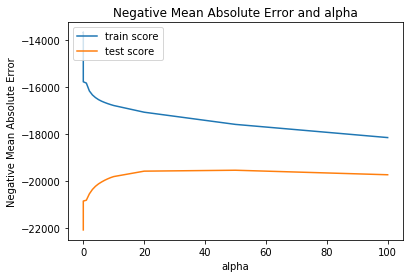

In [40]:
# plotting mean test and train scoes with alpha 

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [41]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-7.00596574e+03, -2.81782594e+03,  4.08507155e+03,  6.88974161e+03,
       -5.32517220e+02,  3.36603906e+03,  8.43213158e+02,  1.67834604e+04,
        4.63868192e+03,  4.47464322e+03,  5.56238378e+03, -4.01424141e+02,
        7.77806973e+03, -5.35981933e+03,  6.66835596e+03,  2.26551052e+03,
       -1.04235250e+03,  1.34001777e+03, -1.68521893e+03, -1.00791763e+03,
       -2.71203784e+03,  1.40334942e+03,  1.41829530e+03,  4.59401365e+03,
       -4.86439329e+02,  2.67457524e+04,  4.62143556e+03, -7.56565833e+02,
        2.60057284e+03,  2.76369254e+03,  3.24533981e+02, -1.97095083e+03,
        6.46810149e+03,  4.08832063e+03, -1.00417267e+03,  2.59565577e+03,
        1.02406981e+04,  9.17476749e+03, -4.46882367e+03,  2.03256116e+03,
       -5.84810442e+02, -2.38532313e+02,  1.80149082e+03,  1.60663893e+03,
       -4.20649031e+02,  4.95114379e+03, -4.84614476e-01, -5.55632835e+02,
        1.03649612e+02,  4.85524342e+02,  7.79581968e+02,  1.70300031e+02,
        7.01839959e+03,  

In [42]:
# Ridge model parameters
model_parameters_ridge = list(ridge.coef_)
model_parameters_ridge.insert(0, ridge.intercept_)
model_parameters_ridge = [round(x, 3) for x in model_parameters_ridge]
cols = X.columns
cols = cols.insert(0, "constant")
var_coef_ridge = list(zip(cols, model_parameters_ridge))
var_coef_ridge

[('constant', 17465.794),
 ('MSSubClass', -7005.966),
 ('LotFrontage', -2817.826),
 ('LotArea', 4085.072),
 ('Street', 6889.742),
 ('LotShape', -532.517),
 ('Utilities', 3366.039),
 ('LandSlope', 843.213),
 ('OverallQual', 16783.46),
 ('OverallCond', 4638.682),
 ('MasVnrArea', 4474.643),
 ('ExterQual', 5562.384),
 ('ExterCond', -401.424),
 ('BsmtQual', 7778.07),
 ('BsmtCond', -5359.819),
 ('BsmtExposure', 6668.356),
 ('BsmtFinType1', 2265.511),
 ('BsmtFinSF1', -1042.353),
 ('BsmtFinType2', 1340.018),
 ('BsmtFinSF2', -1685.219),
 ('BsmtUnfSF', -1007.918),
 ('TotalBsmtSF', -2712.038),
 ('HeatingQC', 1403.349),
 ('CentralAir', 1418.295),
 ('2ndFlrSF', 4594.014),
 ('LowQualFinSF', -486.439),
 ('GrLivArea', 26745.752),
 ('BsmtFullBath', 4621.436),
 ('BsmtHalfBath', -756.566),
 ('FullBath', 2600.573),
 ('HalfBath', 2763.693),
 ('BedroomAbvGr', 324.534),
 ('KitchenAbvGr', -1970.951),
 ('KitchenQual', 6468.101),
 ('Fireplaces', 4088.321),
 ('FireplaceQu', -1004.173),
 ('GarageFinish', 2595.656

### Top 20 features affecting Sales price and their corresponding coefficients (Based on Ridge Regression)

In [43]:
for k,v in sorted(list(zip(model_parameters_ridge,cols)), key=lambda x:abs(x[0]), reverse=True)[1:21]:
    print(f'{v:40}Score: {k}')

GrLivArea                               Score: 26745.752
Condition2_PosN                         Score: -24347.657
Neighborhood_NoRidge                    Score: 23617.923
Neighborhood_StoneBr                    Score: 19058.429
constant                                Score: 17465.794
OverallQual                             Score: 16783.46
RoofMatl_WdShngl                        Score: 15419.085
Exterior2nd_ImStucc                     Score: 14290.937
Neighborhood_Edwards                    Score: -13898.101
Condition2_Norm                         Score: 13783.242
LandContour_HLS                         Score: 13597.189
HouseStyle_1Story                       Score: 12918.27
Neighborhood_Crawfor                    Score: 12911.003
RoofMatl_CompShg                        Score: 12259.271
Exterior2nd_Stucco                      Score: -11801.188
LandContour_Lvl                         Score: 10861.191
Exterior1st_BrkFace                     Score: 10728.82
GarageCars                     

# Lasso Regression

In [44]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You 

C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You 

C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\thejasvini\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [45]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.245014,0.029280,0.0016,0.000490,0.0001,{'alpha': 0.0001},-24686.061686,-16051.283379,-23772.257596,-22799.637850,...,-21679.060993,3056.231125,28,-12905.773707,-14338.158218,-13937.078975,-14007.339452,-13361.871431,-13710.044356,510.398232
1,0.231813,0.022747,0.0018,0.000980,0.001,{'alpha': 0.001},-24686.451012,-16051.295268,-23770.296443,-22799.343245,...,-21678.661959,3056.018675,27,-12905.772193,-14338.147122,-13937.071325,-14007.335253,-13361.867274,-13710.038633,510.395376
2,0.228413,0.026121,0.0020,0.000632,0.01,{'alpha': 0.01},-24690.345124,-16051.413582,-23750.686080,-22796.367809,...,-21674.666045,3053.903658,26,-12905.822532,-14338.091049,-13937.044565,-14007.343293,-13361.879555,-13710.036199,510.362591
3,0.233413,0.024922,0.0018,0.000400,0.05,{'alpha': 0.05},-24690.316095,-16051.230214,-23663.639047,-22783.778933,...,-21653.446580,3041.603503,25,-12906.449792,-14338.007260,-13936.974125,-14007.519733,-13362.251504,-13710.240483,510.107837
4,0.235413,0.029297,0.0034,0.003323,0.1,{'alpha': 0.1},-24687.723120,-16050.927204,-23555.048402,-22768.644085,...,-21626.560914,3026.254105,24,-12907.269914,-14337.899948,-13936.938934,-14007.770877,-13362.802105,-13710.536356,509.773999


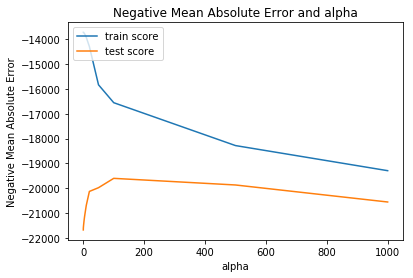

In [46]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [47]:
alpha =100
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train, y_train)
lasso.coef_

array([-7.96931864e+03, -2.58911381e+03,  4.30396030e+03,  1.00433718e+03,
       -5.32629659e+02,  0.00000000e+00,  0.00000000e+00,  1.58575999e+04,
        4.73716092e+03,  4.38312843e+03,  4.80642035e+03, -0.00000000e+00,
        6.41018170e+03, -4.13815469e+03,  7.09295687e+03,  2.16931212e+03,
        0.00000000e+00,  6.31944320e+02, -9.96934857e+02, -5.33039449e+02,
       -3.87776474e+03,  1.30381636e+03,  0.00000000e+00,  1.42781017e+03,
       -6.83538275e+02,  3.13828038e+04,  4.30806296e+03, -3.29043826e+02,
        2.01215758e+03,  2.10694074e+03, -4.94603736e+02, -1.20025553e+03,
        5.92252427e+03,  2.88585551e+03, -5.97686502e+02,  2.23867921e+03,
        9.46738085e+03,  6.92842102e+03, -2.28860780e+03,  1.56205247e+03,
       -0.00000000e+00, -1.97077946e+02,  1.31765033e+03,  1.38507620e+03,
        3.43089977e+02,  0.00000000e+00,  0.00000000e+00, -3.60422520e+02,
        2.58022730e+02, -7.94703835e+02,  3.19553978e+02,  1.87596504e+01,
        6.84553303e+03,  

In [48]:
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)

In [49]:
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

In [50]:
print('r2_score in train dataset:')
print('ridge:', r2_score(y_train, y_pred_ridge_train))
print('lasso:', r2_score(y_train, y_pred_lasso_train))

print('r2_score in test dataset:')
print('ridge:', r2_score(y_test, y_pred_ridge_test))
print('lasso:', r2_score(y_test, y_pred_lasso_test))

r2_score in train dataset:
ridge: 0.8806718286426769
lasso: 0.8888473306746631
r2_score in test dataset:
ridge: 0.8595007344083855
lasso: 0.8546807641831491


Text(0.5, 0, 'Errors-Lasso')

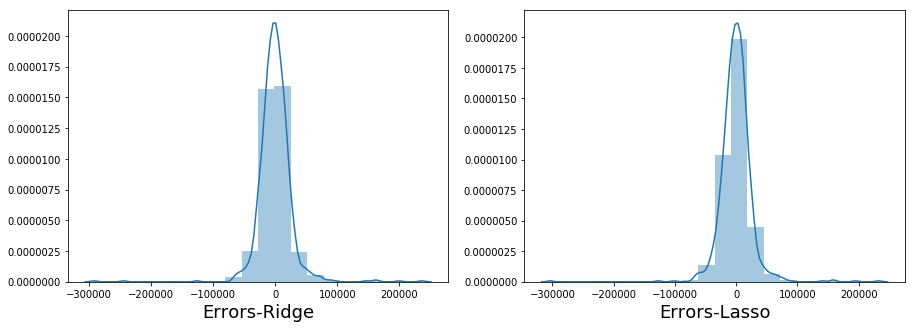

In [51]:
# Plot the histogram of the error terms- Ridge and Lasso
plt.figure(figsize=(15,5))
ax =plt.subplot(121)
sns.distplot((y_train - y_pred_ridge_train), bins = 20)             
plt.xlabel('Errors-Ridge', fontsize = 18)

ax=plt.subplot(122)
sns.distplot((y_train - y_pred_lasso_train), bins = 20)     
plt.xlabel('Errors-Lasso', fontsize = 18)

#### From above plots, we can see that the residuals are normally distributed. Hence we dont need to do any log transformation on the y variable

In [52]:
#lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coef = list(zip(cols, model_parameters))
var_coef

[('constant', 44804.401),
 ('MSSubClass', -7969.319),
 ('LotFrontage', -2589.114),
 ('LotArea', 4303.96),
 ('Street', 1004.337),
 ('LotShape', -532.63),
 ('Utilities', 0.0),
 ('LandSlope', 0.0),
 ('OverallQual', 15857.6),
 ('OverallCond', 4737.161),
 ('MasVnrArea', 4383.128),
 ('ExterQual', 4806.42),
 ('ExterCond', -0.0),
 ('BsmtQual', 6410.182),
 ('BsmtCond', -4138.155),
 ('BsmtExposure', 7092.957),
 ('BsmtFinType1', 2169.312),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinType2', 631.944),
 ('BsmtFinSF2', -996.935),
 ('BsmtUnfSF', -533.039),
 ('TotalBsmtSF', -3877.765),
 ('HeatingQC', 1303.816),
 ('CentralAir', 0.0),
 ('2ndFlrSF', 1427.81),
 ('LowQualFinSF', -683.538),
 ('GrLivArea', 31382.804),
 ('BsmtFullBath', 4308.063),
 ('BsmtHalfBath', -329.044),
 ('FullBath', 2012.158),
 ('HalfBath', 2106.941),
 ('BedroomAbvGr', -494.604),
 ('KitchenAbvGr', -1200.256),
 ('KitchenQual', 5922.524),
 ('Fireplaces', 2885.856),
 ('FireplaceQu', -597.687),
 ('GarageFinish', 2238.679),
 ('GarageCars', 9467.381),
 

In [53]:
# Filter out the Features where coefficients is not equal to 0
var_coef = [x for x in var_coef if abs(x[-1] != 0)]
var_coef

[('constant', 44804.401),
 ('MSSubClass', -7969.319),
 ('LotFrontage', -2589.114),
 ('LotArea', 4303.96),
 ('Street', 1004.337),
 ('LotShape', -532.63),
 ('OverallQual', 15857.6),
 ('OverallCond', 4737.161),
 ('MasVnrArea', 4383.128),
 ('ExterQual', 4806.42),
 ('BsmtQual', 6410.182),
 ('BsmtCond', -4138.155),
 ('BsmtExposure', 7092.957),
 ('BsmtFinType1', 2169.312),
 ('BsmtFinType2', 631.944),
 ('BsmtFinSF2', -996.935),
 ('BsmtUnfSF', -533.039),
 ('TotalBsmtSF', -3877.765),
 ('HeatingQC', 1303.816),
 ('2ndFlrSF', 1427.81),
 ('LowQualFinSF', -683.538),
 ('GrLivArea', 31382.804),
 ('BsmtFullBath', 4308.063),
 ('BsmtHalfBath', -329.044),
 ('FullBath', 2012.158),
 ('HalfBath', 2106.941),
 ('BedroomAbvGr', -494.604),
 ('KitchenAbvGr', -1200.256),
 ('KitchenQual', 5922.524),
 ('Fireplaces', 2885.856),
 ('FireplaceQu', -597.687),
 ('GarageFinish', 2238.679),
 ('GarageCars', 9467.381),
 ('GarageQual', 6928.421),
 ('GarageCond', -2288.608),
 ('WoodDeckSF', 1562.052),
 ('EnclosedPorch', -197.078

In [54]:
initial_df= pd.read_csv("train.csv")
initial_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
#Identifying important features by removing the dummies
final_var = []
for i in list(initial_df):
    for j in var_coef:
        if i in j[0]:
            final_var.append(i)
            break
print(final_var)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition']


#### Seperate the variables into positive and negative coefficient list

In [56]:
#variables with positive coefficients
pos_var = [x for x in var_coef if x[-1] > 0]
final_var_pos = []
for i in list(initial_df):
    for j in pos_var:
        if i in j[0]:
            final_var_pos.append(i)
            break
print(final_var_pos)
print(len(final_var_pos))

['MSZoning', 'LotArea', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive', 'WoodDeckSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'SaleType', 'SaleCondition']
45


In [57]:
#variables with negative coefficients
neg_var = [x for x in var_coef if x[-1] < 0]
final_var_neg = []
for i in list(initial_df):
    for j in neg_var:
        if i in j[0]:
            final_var_neg.append(i)
            break
print(final_var_neg)
print(len(final_var_neg))

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtCond', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'FireplaceQu', 'GarageCond', 'EnclosedPorch', 'MiscVal']
30


### Top 20 features affecting Sales price and their corresponding coefficients (Based on Lasso Regression)

In [58]:
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:21]:
    print(f'{v:40}Score: {k}')

constant                                Score: 44804.401
RoofMatl_WdShngl                        Score: 40381.227
Neighborhood_NridgHt                    Score: 40242.758
Neighborhood_NoRidge                    Score: 35287.192
GrLivArea                               Score: 31382.804
Neighborhood_StoneBr                    Score: 29797.692
RoofMatl_CompShg                        Score: 21833.725
Exterior2nd_ImStucc                     Score: 21266.67
Neighborhood_Crawfor                    Score: 19053.805
Exterior2nd_Stucco                      Score: -17943.756
OverallQual                             Score: 15857.6
SaleType_New                            Score: 14310.443
Exterior1st_BrkFace                     Score: 11809.022
LandContour_HLS                         Score: 11616.538
HouseStyle_1Story                       Score: 11134.325
Neighborhood_Somerst                    Score: 11068.176
Exterior2nd_Wd Shng                     Score: -10772.786
Neighborhood_BrkSide            

## Final Results
Optimum value of lambda for Ridge Regression : 10 <br>
Optimum value of lambda for Lasso Regression : 100

### Ridge Regression
r2 score for train set : 0.88 <br>
r2 score for test set   : 0.86
### Lasso Regression
r2 score for train set : 0.89 <br>
r2 score for test set   : 0.85

## Code for Part-II Subjective Questions
### Question -1

In [59]:
# Optimal value of alpha for ridge is 10 and lasso regression is 100
# Let us double the value of alpha for both ridge and lasso and check the most important predictor variables after 
# the change is implemented

# RIDGE Regression with alpha= 20( double the original value=10)
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [60]:
# Ridge model parameters
model_parameters_ridge = list(ridge.coef_)
model_parameters_ridge.insert(0, ridge.intercept_)
model_parameters_ridge = [round(x, 3) for x in model_parameters_ridge]
cols = X.columns
cols = cols.insert(0, "constant")
var_coef_ridge = list(zip(cols, model_parameters_ridge))

In [61]:
# Top 5 features with alpha=20 for Ridge
for k,v in sorted(list(zip(model_parameters_ridge,cols)), key=lambda x:abs(x[0]), reverse=True)[1:6]:
    print(f'{v:40}Score: {k}')

GrLivArea                               Score: 24416.487
Neighborhood_NridgHt                    Score: 22686.183
Neighborhood_NoRidge                    Score: 18402.464
OverallQual                             Score: 17245.703
Neighborhood_StoneBr                    Score: 13342.804


In [62]:
# LASSO Regression with alpha= 200( double the original value=100)
alpha =200
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train, y_train)

Lasso(alpha=200, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
#lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coef = list(zip(cols, model_parameters))

In [64]:
# Top 5 features with alpha=200 for Lasso
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:7]:
    print(f'{v:40}Score: {k}')

constant                                Score: 70398.735
Neighborhood_NridgHt                    Score: 37304.785
Neighborhood_NoRidge                    Score: 33120.732
GrLivArea                               Score: 28969.543
Neighborhood_StoneBr                    Score: 25017.907
OverallQual                             Score: 16820.406


### Question-2

In [65]:
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

model_parameters_ridge = list(ridge.coef_)
model_parameters_ridge.insert(0, ridge.intercept_)
model_parameters_ridge = [round(x, 3) for x in model_parameters_ridge]
cols = X.columns
cols = cols.insert(0, "constant")
var_coef_ridge = list(zip(cols, model_parameters_ridge))

# Filter out the Features where coefficients is not equal to 0
var_coef_ridge = [x for x in var_coef_ridge if abs(x[-1] != 0)]
print(len(var_coef_ridge))

196


In [66]:
alpha =100
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train, y_train)

#lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coef = list(zip(cols, model_parameters))

# Filter out the Features where coefficients is not equal to 0
var_coef = [x for x in var_coef if abs(x[-1] != 0)]
print(len(var_coef))

99


### Question-3
Create another model for Lasso excluding the five most important predictor variables and find out the five most important predictor variables now

In [67]:
X_train.drop(columns=['RoofMatl_WdShngl','Neighborhood_NridgHt','Neighborhood_NoRidge','GrLivArea','Neighborhood_StoneBr'], axis=1, inplace=True)
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=194)

In [68]:
# LASSO Regression with alpha= 100
alpha =100
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train, y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
#lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coef = list(zip(cols, model_parameters))

In [70]:
# New Top 5 features with optimal alpha (100) for Lasso
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:7]:
    print(f'{v:40}Score: {k}')

constant                                Score: 80546.021
Exterior2nd_Brk Cmn                     Score: 26503.679
2ndFlrSF                                Score: 25158.9
Exterior2nd_ImStucc                     Score: -21357.033
Neighborhood_Edwards                    Score: -21073.356
OverallQual                             Score: 20397.724
